# Probabilidade e Estatística

## Curso Superior de Tecnologia em Ciência de Dados

### Prof. Dr. Neylson Crepalde

Conteúdo abordado: teste de significância

Principal fonte: STEVENSON, Wiliam J.; DE FARIAS, Alfredo Alves. **Estatística aplicada à administração.** São Paulo: Harper e Row do Brasil, 1981.

---

# Testes de significância

> A *finalidade dos testes de significância* é avaliar afirmações sobre os valores de parâmetros populacionais.

**O primeiro passo** consiste em formular duas hipóteses sobre a afirmação. As hipóteses são explicações potenciais (teorias) que procuram levar em conta fatos observados em situações onde existem algumas incógnitas. Mais formalmente, a hipótese que sugere que a afirmação é verdadeira chama-se *hipótese nula* e se designa pelo símbolo $H_0$; a que sugere que a afirmação é falsa chama-se *hipótese alternativa* e se designa pelo símbolo $H_1$.

>A *hipótese nula* $H_0$ é uma afirmação que diz que o parâmetro populacional é tal como especificado (isto é, a afirmação é verdadeira).
>
>A *hipótese alternativa* $H_1$ é uma afirmação que oferece uma alternativa à alegação (isto é, o parâmetro é maior (ou menor) que o valor alegado).

### Variação causal ou variação real?

O "teste" consiste em verificar se uma estatística amostral observada pode razoalmente provir de uma poopulação com o parâmetro alegado. Logo, o que queremos levar em conta é a variabilidade amostral que pode ocorrer quando se tem uma população tal como a alegada. 

**O segundo passo** consiste em identificar a distribuiçâo amostral adequada, pois ela descreverá completamente a variação.

$$\sigma_p = \sqrt{\frac{p(1-p)}{n}}$$

onde $p$ é a proporção populacional e $n$ é o tamanho da amostra.

>O *nível de significância* de um teste é a probabilidade de uma hipótese nula ser rejeitada, quando verdadeira.

#### Exemplo

Considere a seguinte situação: Inspeciona-se uma amostra de 142 peças de uma grande remessa, encontrando-se 8% defeituosas. O fornecedor garante que não haverá mais de 6% de peças defeituosas em cada remessa. O que devemos responder, com auxílio dos testes de significância, é se a afirmação é verdadeira ou falsa.

1º passo: montar o teste de hipótese

\begin{align}
H_0 :& = 6\% \\
H_1 :& > 6\% \\
\end{align}

Se a afirmação do fornecedor é verdadeira, nossa proporção amostral de 8% provém de uma distribuição amostral com média 6% e desvio padrão

$$\sigma_p = \sqrt{\frac{(0,06)(0,94)}{142}} = 0,02$$

Podemos agora ver que nossa discrepância de 2% está a um desvio padrão acima do valor esperado, supondo que 0,06 seja a verdadeira proporção populacional:

$$z = \frac{0,08 - 0,06}{0,02} = +1,0$$

Além disso, a probabilidade de obter uma discrepância *superior* a 8% com uma amostra de 142 extraída de uma população com proporção de 6% é de cerca de 16%. Isso parece sugerir que a discrepância *pode* ser devida apenas ao acaso. Não é preciso dizer que *não podemos* afirmar, em definitivo, que a população tenha realmente uma percentagem de 6% de defeituosas, mas em vista da distribuição amostral de tal população e da estatística amostral observada, a afirmação parece verdadeira. 

In [61]:
using StatsPlots, Distributions, KernelDensity, LaTeXStrings

In [37]:
function npdensity(z)
    n = size(z,2)
    for i = 1:n
        x = z[:,i]
        y = kde(x)
        desv = std(x)
        m = mean(x)

        Plots.plot(range(-(desv*3), stop=(desv*1), length=100),z->pdf(y,z), color=:blue, 
                    fill=(0,0.5,:white), legend=false)
        Plots.plot!(range(desv, stop=desv*3, length=100),z->pdf(y,z), color=:blue, fill=(0,0.5,:grey))
    end
end

npdensity (generic function with 1 method)

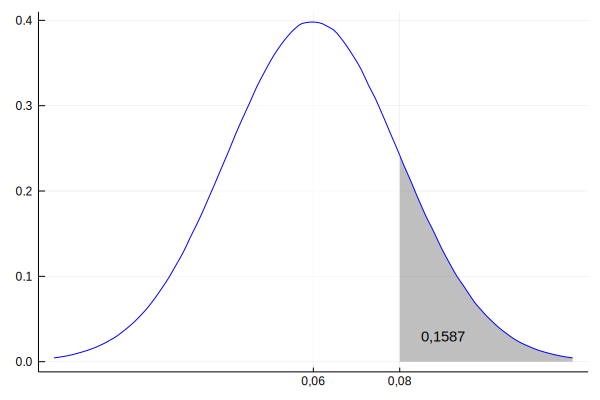

In [38]:
vetor = rand( Normal( 0 , 1 ),10000000)
npdensity(vetor)
xticks!([0,1], ["0,06", "0,08"])
annotate!([(1.5, 0.03, text("0,1587", 10))])

Por outro lado, se tivéssemos uma proporção amostral, digamos, de 19%, então

$$z = \frac{0,19 - 0,06}{0,02} = +6,5$$

e parece muito pouco provável que tal estatística amostral provenha de uma população com o parâmetro alegado de 6%. Em tal caso estaríamos mais inclinados a rejeitar $H_0$. A figura abaixo ilustra  as duas situações.

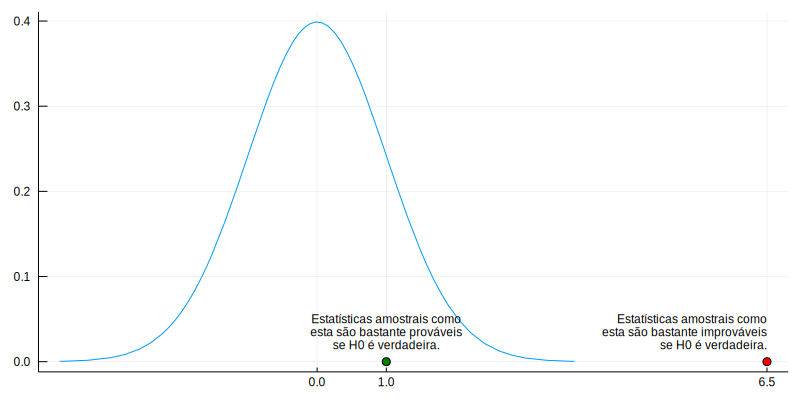

In [27]:
plot(Normal(), legend=false, size=(800,400))
scatter!([1], [0], color=:green)
scatter!([6.5], [0], color=:red)
xticks!([0,1,6.5])
annotate!([(1.0, 0.035, text("Estatísticas amostrais como\nesta são bastante prováveis\nse H0 é verdadeira.", 8)),
        (6.5, 0.035, text("Estatísticas amostrais como\nesta são bastante improváveis\nse H0 é verdadeira.", 
                8, :right))])

Como podemos traçar uma linha divisória entre o que pode ser razoavelmente considerado como "variação casual" e o que deve ser considerado como "variação significativa"? 

Consideremos o seguinte: aproximadamente 5% da estatística amostral numa distribuição normal produz um $z$ maior que $+1,65$. Assim, embora o valor amostral *esperado* seja 6%, 5% das estatísticas amostrais possíveis terão valores que excedem $p + 1,65 \sigma_p$ como linha divisória. Logo, **se aceitamos $z = 1,65$ como linha divisória, há um risco de 5% de rejeitar $H_0$ quando ela é de fato verdadeira**. Outra possibilidade consistiria consistiria em usar $z = 2,33$ como nosso "valor crítico", pois então **haveria apenas cerca de 1% de chance de observar uma estatística amostral mais extrema que aquela quando $H_0$ é verdadeira**. Naturalmente, a distribuição amostral teórica se estende até o infinito de modo que devemos traçar a linha em algum lugar. Além disso, já concordamos que certos valores pareceriam tão improváveis que poderíamos descartá-los logo de início. 

Comumente os valores críticos escolhidos para os testes de significância são os que dão riscos de 5%, 2,5% ou 1% de rejeitar $H_0$ quando ela é verdadeira.

>O *nivel de significância* de um teste é a probabilidade de uma hipótese nula ser rejeitada, quando verdadeira.

Desginamos o nível de significância pela letra grega $\alpha$ (alfa).

O **terceiro passo** num teste de significância consiste em escolher um nível de significância aceitável. Isto, por seu turno, indicará um valor crítico correspondente que servirá de padrão de comparação, em relação ao qual julgaremos uma "estatística de teste" observada (p. ex., a proporção amostral de 8% tem um $z_{teste}$ de $1,0$.

In [65]:
function npdensity(z)
    x = z
    y = kde(x)
    desv = std(x)
    m = mean(x)

    Plots.plot(range(-(desv*3), stop=-(desv*1.96), length=100),z->pdf(y,z), color=:red, fill=(0,0.5,:red), label="Área de rejeição", size=(800,400))
    Plots.plot!(range(-(desv*1.96), stop=(desv*1.96), length=100),z->pdf(y,z), color=:green, fill=(0,0.5,:green), label="Área de aceitação")
    Plots.plot!(range(desv*1.96, stop=desv*3, length=100),z->pdf(y,z), color=:red, fill=(0,0.5,:red), label="Área de rejeição")
end

npdensity (generic function with 1 method)

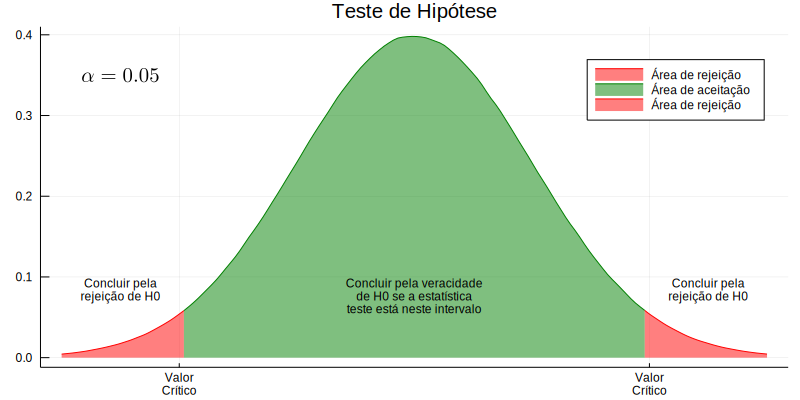

In [66]:
npdensity(vetor)
title!("Teste de Hipótese")
xticks!([-2, 2],["Valor\nCrítico", "Valor\nCrítico"])
annotate!([(-2.5, 0.1, text("Concluir pela\nrejeição de H0", 8, :top)), 
        (0, 0.1, text("Concluir pela veracidade\nde H0 se a estatística\nteste está neste intervalo", 8, :top)),
        (2.5, 0.1, text("Concluir pela\nrejeição de H0", 8, :top)),
        (-2.5, 0.35, L"\alpha = 0.05")])

---

# Testes Unilaterais e Testes Bilaterais

Essencialmente a hipótese alternativa de um teste de hipóteses é usada para indicar qual o aspecto da variação não-aleatória que nos interessa. Há três casos possíveis: (1) concentrar *em ambas as direções*; (2) concentrar nos desvios *abaixo* do valor esperado; ou (3) concentrar nos desvios *acima* do valor esperado. Simbolicamente, no caso da jogada de uma moeda, esses três casos poderiam escrever-se:

\begin{align}
H_0 : p = 0,50 & \\
H_0 : p \neq 0,50 & \quad \text{(ambas as direções: muito ou muito poucos)} \\
H_0 : p < 0,50 &  \quad \text{(desvio abaixo: muito poucas caras)} \\
H_0 : p > 0,50 &  \quad \text{(desvio acima: muitas caras)} \\
\end{align}

# Erro Tipo I e Tipo II

>Comete-se um *erro Tipo I* rejeitando-se $H_0$ quando $H_0$ é verdadeira (Falso Negativo). A probabilidade de um erro Tipo I é igual ao nível de significância de um teste de hipótese.
>
>Comete-se um *erro Tipo II* aceitando-se $H_0$ quando ela não é verdadeira (Falso Positivo).